**Trabajo Final Fundamentos de aprendizaje de máquina**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv")
df['Revenue'] = LabelEncoder().fit_transform(df.Revenue.values)
l={'OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Month'}
for s in l:
  df = df.astype({s: object})
df.describe().loc[['mean','min','max']]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.74622,0.022191,0.043073,5.889258,0.061427,0.154745
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.52223,0.200000,0.200000,361.763742,1.000000,1.000000


In [ ]:
df.shape

(12330, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  object 
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

In [ ]:
df['Revenue'].value_counts(dropna=True)

0    10422
1     1908
Name: Revenue, dtype: int64

In [ ]:
df.Month.unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

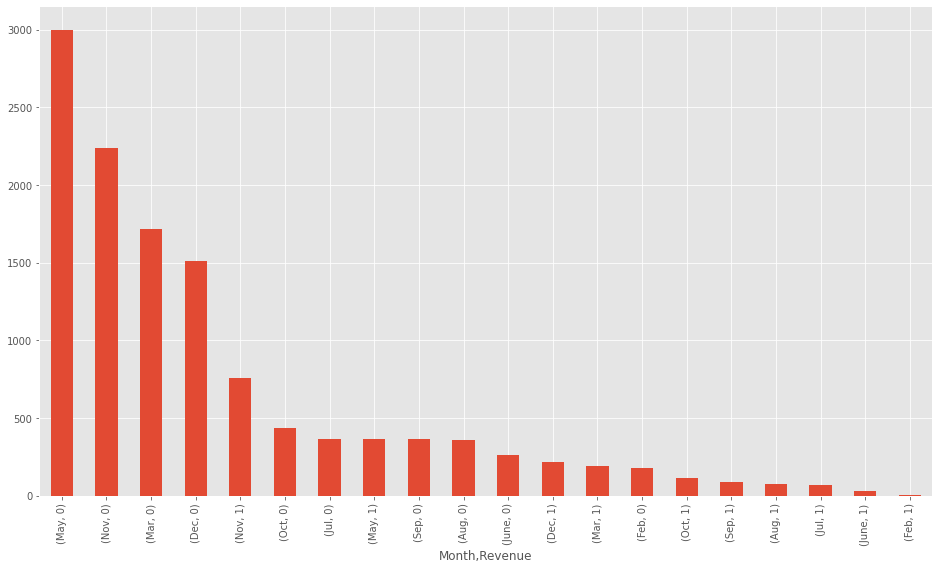

In [ ]:
df[['Month', 'Revenue']].value_counts().plot(kind='bar')

Index(['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'VisitorType', 'Weekend'],
      dtype='object')
7


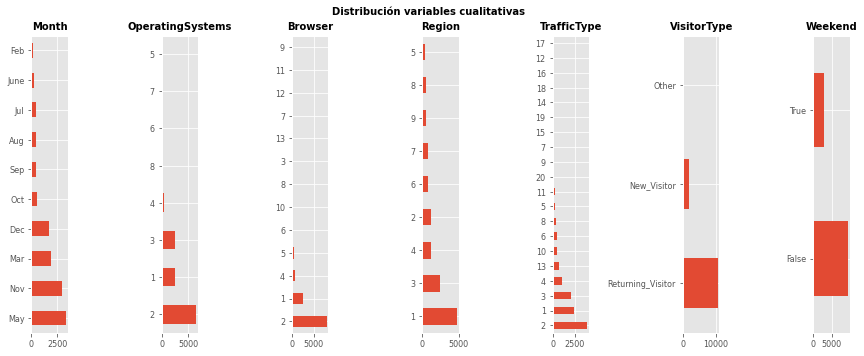

In [ ]:
columnas_object = df.select_dtypes(include=['object']).columns
fig, axes = plt.subplots(nrows=1, ncols=len(columnas_object), figsize=(12, 5))
axes = axes.flat
print(columnas_object)
print(len(columnas_object))
for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
  
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 10, fontweight = "bold");

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd45d613f28>,
      dtype=object)

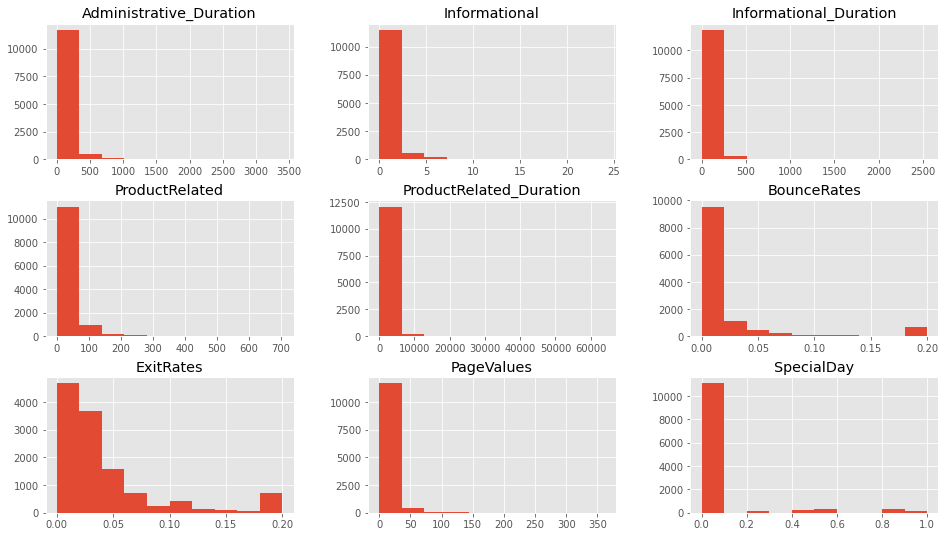

In [ ]:
df[['Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']].hist()

In [ ]:
for i in range(df.shape[1]):
  print(df.columns.values[i])
  print(df.iloc[:,i].unique())

Administrative
[ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26]
Administrative_Duration
[  0.         53.         64.6       ... 167.9107143 305.125
 150.3571429]
Informational
[ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]
Informational_Duration
[  0.   120.    16.   ... 547.75 368.25 211.25]
ProductRelated
[  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29  34  71  63
  87  40  33  54  64  75  39 111  81  61  47  44  88 149  41  79  66  43
 258  80  62  83 173  48  58  57  56  69  82  59 109 287  53  84  78 137
 113  89  65  60 104 129  77  74  93  76  72 194 140 110 132 115  73 328
 160  86 150  95 130 151 117 124 127 125 116 105  92 157 154 220 187 112
 131 159  94 204 142 206 102 313 145  85  97 198 181 126 106 101 108 119
  70 122  91 276 100 291 114 172 217 141 133 156 136 180 135 195 

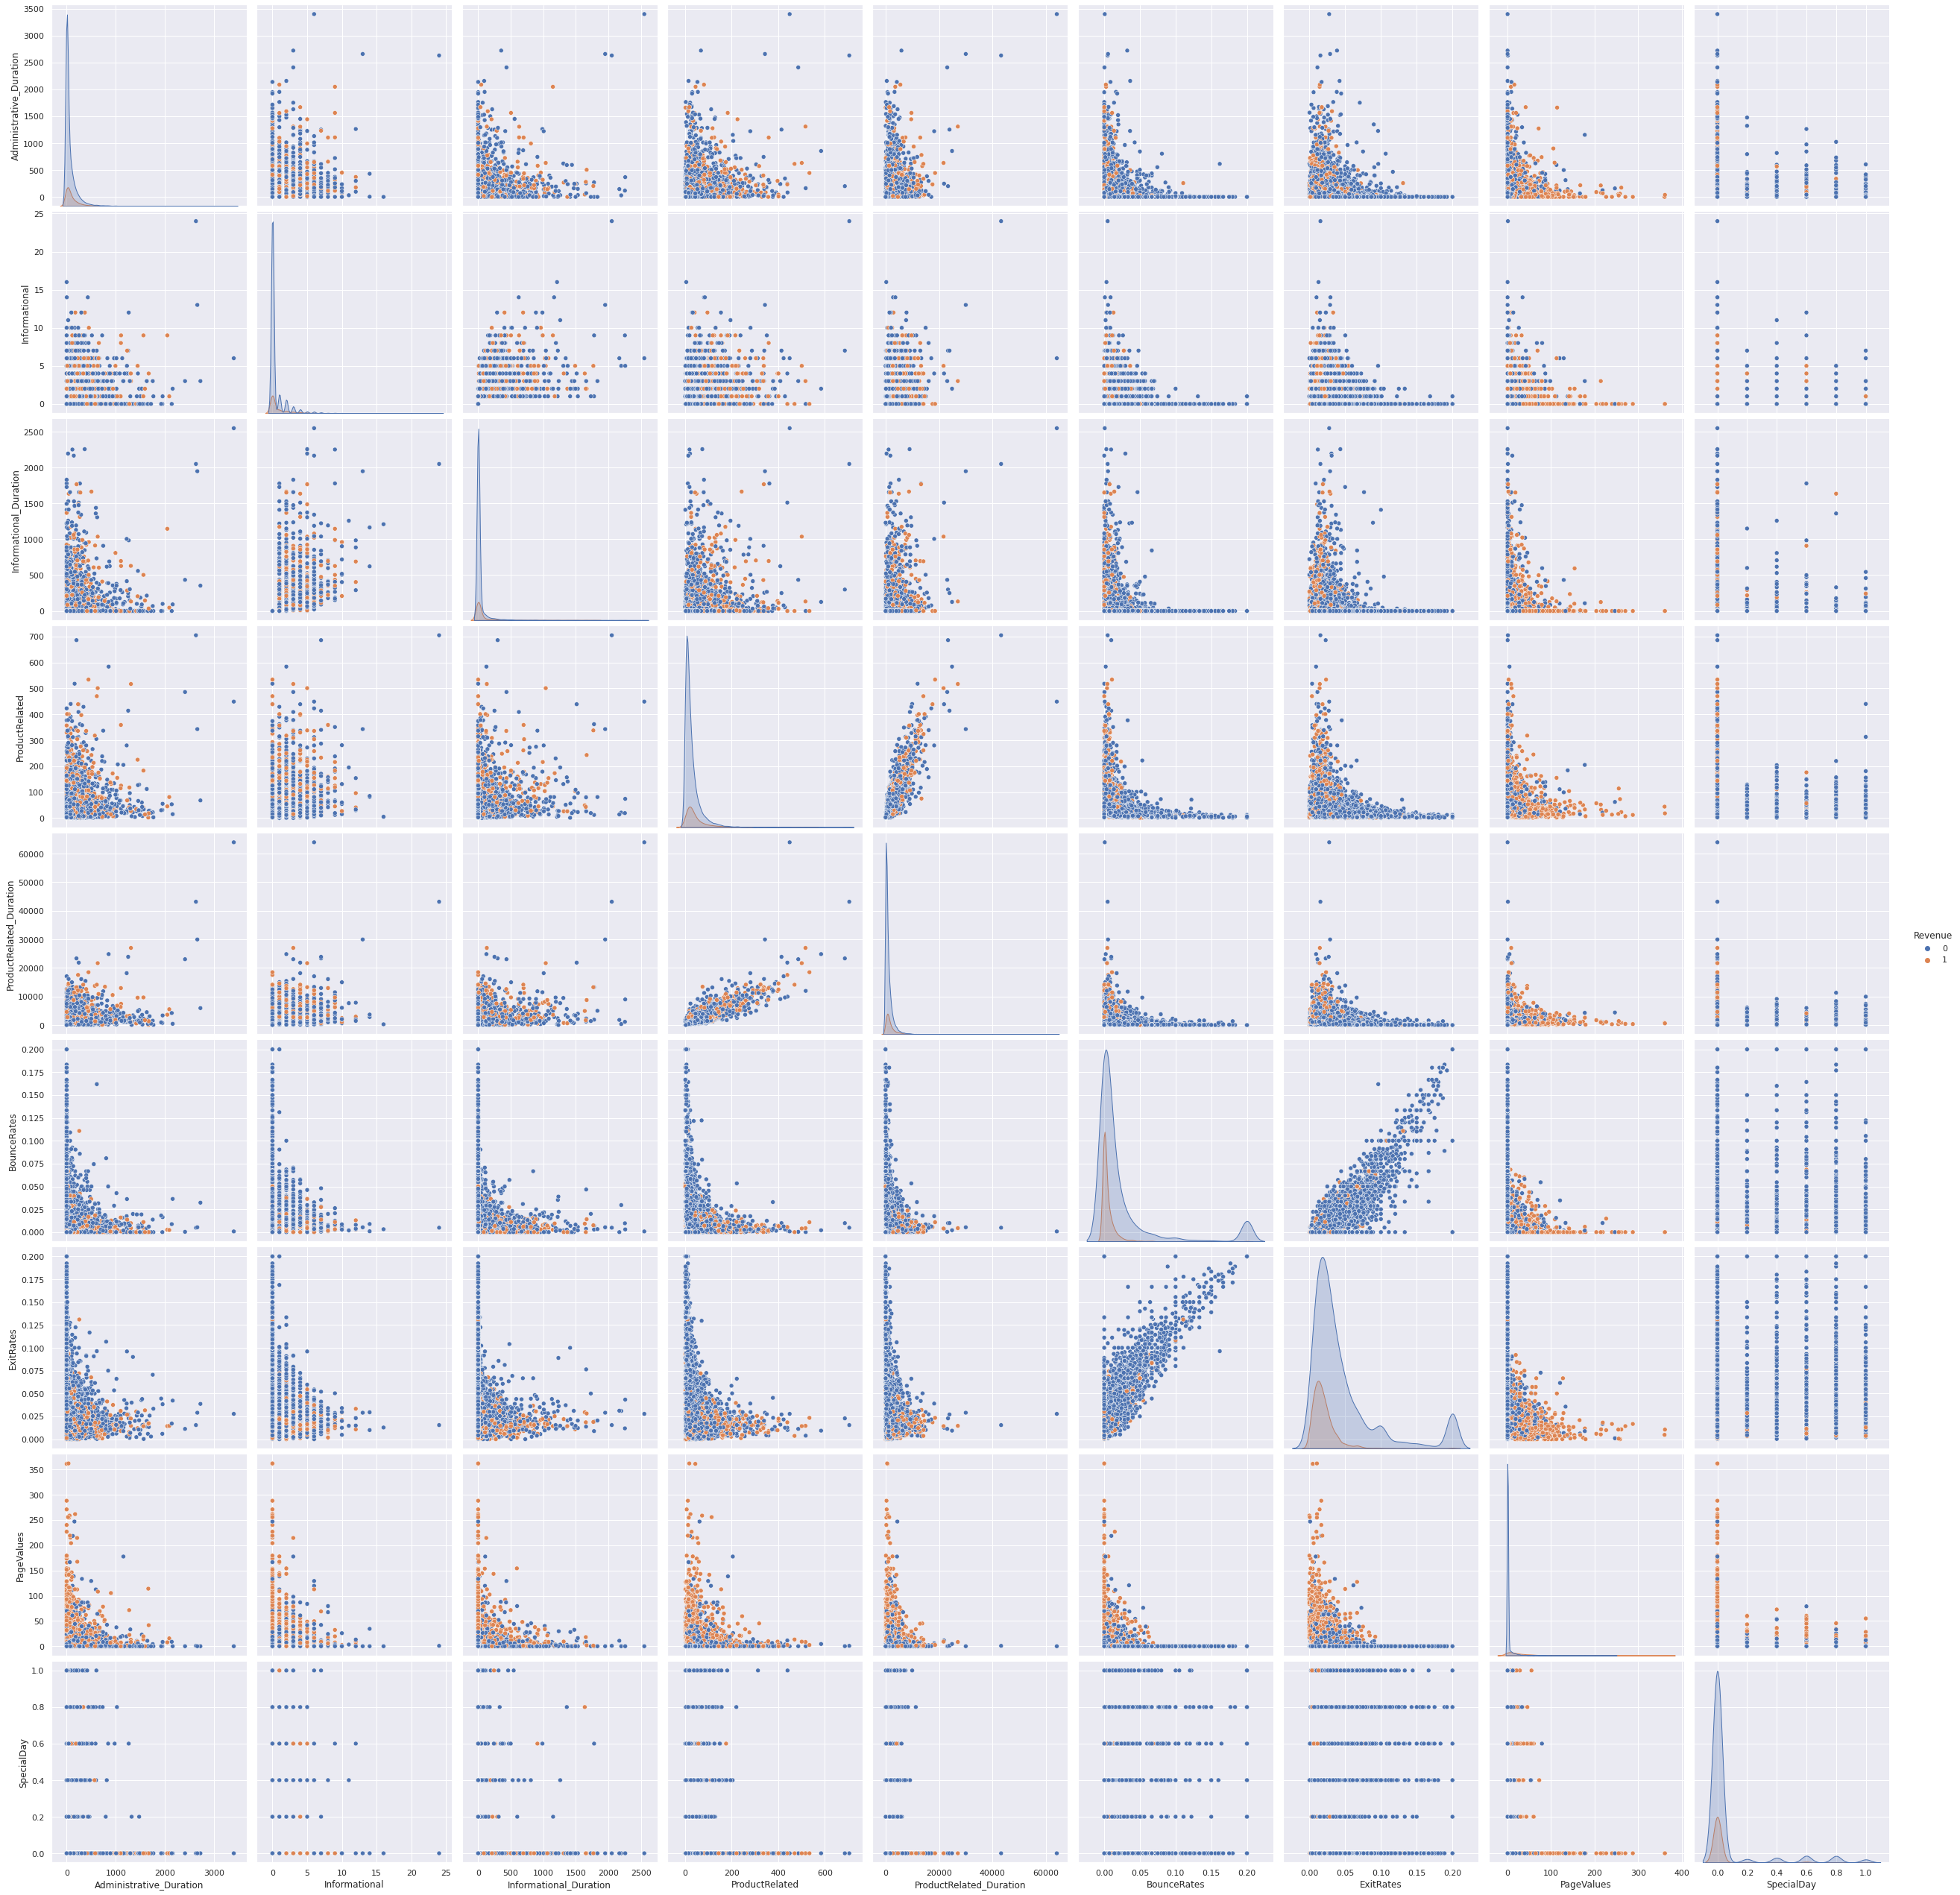

In [ ]:
import seaborn as sb
sb.set()
mis_col=['Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']
#sb.pairplot(df[mis_col])
sb.pairplot(df.dropna(), hue='Revenue',height=4,vars=mis_col,kind='scatter')

Text(0.5, 1.0, 'Matriz de Correlación Pearson')

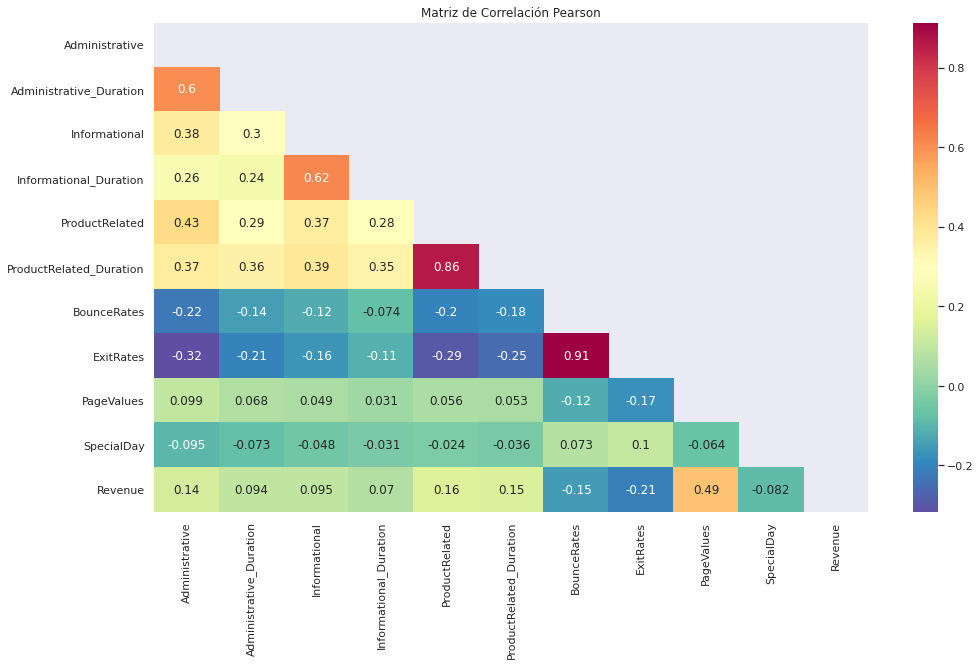

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
sb.set()
pearsoncorr = df.corr(method='pearson')
pearsoncorr
mask = np.zeros_like(pearsoncorr)
mask[np.triu_indices_from(mask)] = True
sb.heatmap(pearsoncorr, annot=True, cmap='Spectral_r', mask=mask)
plt.title('Matriz de Correlación Pearson')

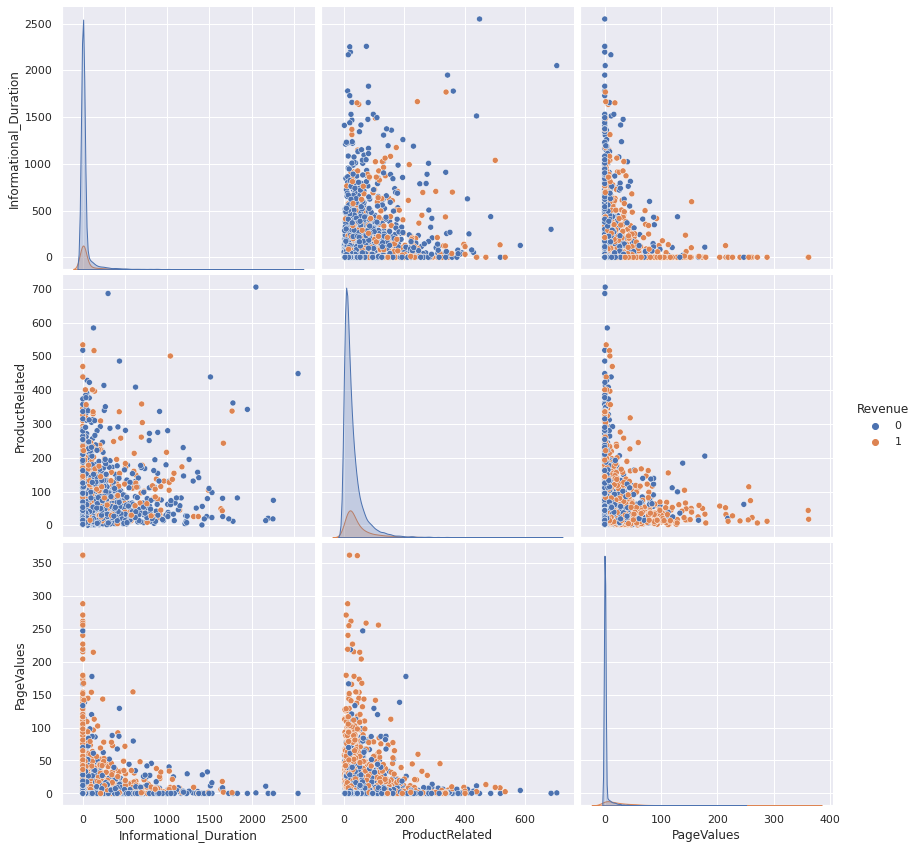

In [ ]:
#c_eval = ["Informational_Duration", "ProductRelated", "PageValues"]
# 0 3 7
c_eval = ['Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']
sel = [c_eval[5], c_eval[6], c_eval[7]]
sb.pairplot(df.dropna(), hue='Revenue',height=4,vars=[c_eval[2], c_eval[3], c_eval[7]],kind='scatter')
#sb.pairplot(df.dropna(), hue='Revenue',height=4,vars= sel,kind='scatter')

In [ ]:
X = np.array(df[sel])
y = np.array(df['Revenue'])
print("Tamaños para el Kmean", X.shape, y.shape)

Tamaños para el Kmean (12330, 3) (12330,)


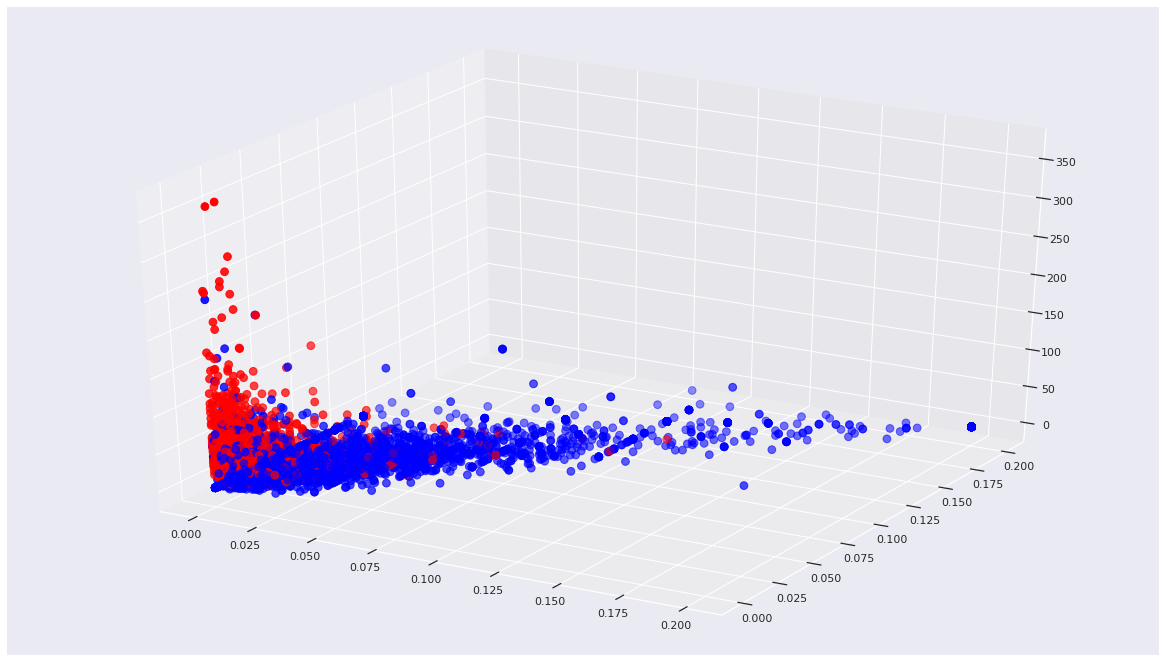

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
colores = ['blue', 'red', 'green', 'purple', 'yellow']
asignar = []
d = 0
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=60)

Obtener el valor K


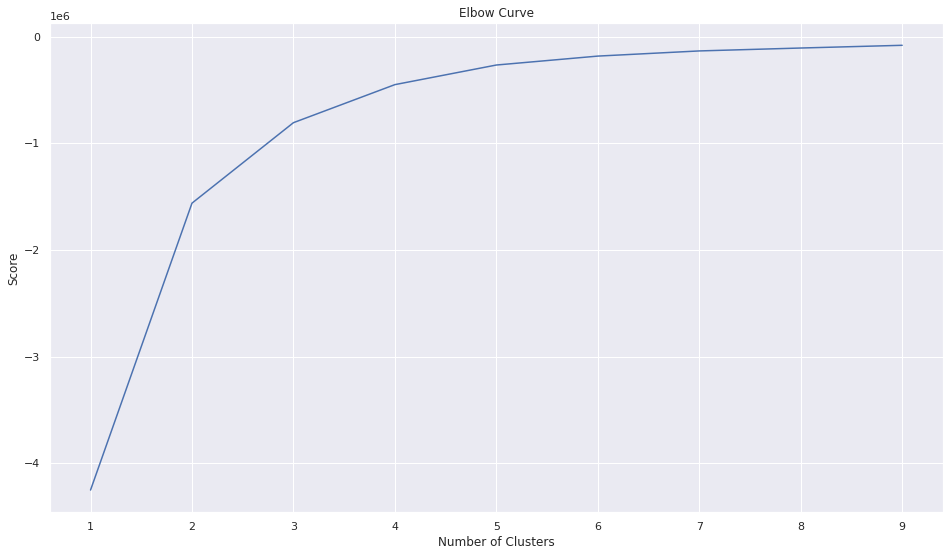

In [ ]:
from sklearn.cluster import KMeans
print('Obtener el valor K')
Nc = range(1, 10)
kmeans = [KMeans(n_clusters = i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print("Se encontró los centroides", centroids.shape)
kmeans.labels_.shape, df.shape

Se encontró los centroides (4, 3)


((12330,), (12330, 18))

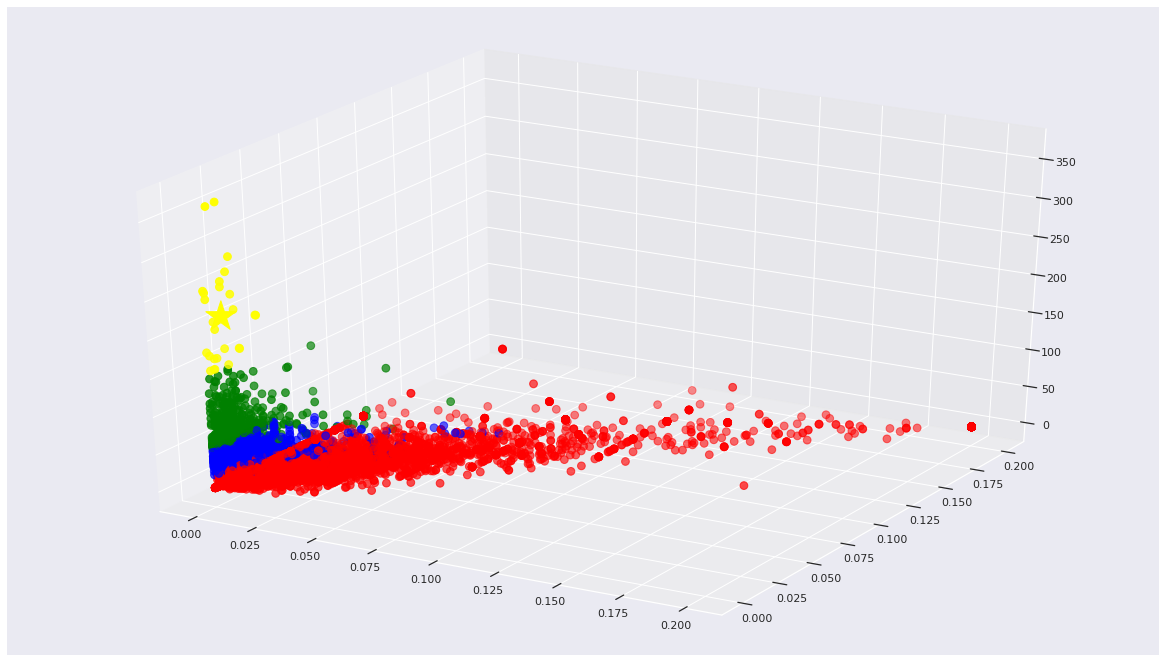

In [ ]:
# Predicting the clusters
labels = kmeans.predict(X)
C = kmeans.cluster_centers_
colores = ['red', 'green', 'blue', 'yellow']
asignar = []
for row in labels:
    asignar.append(colores[row])
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

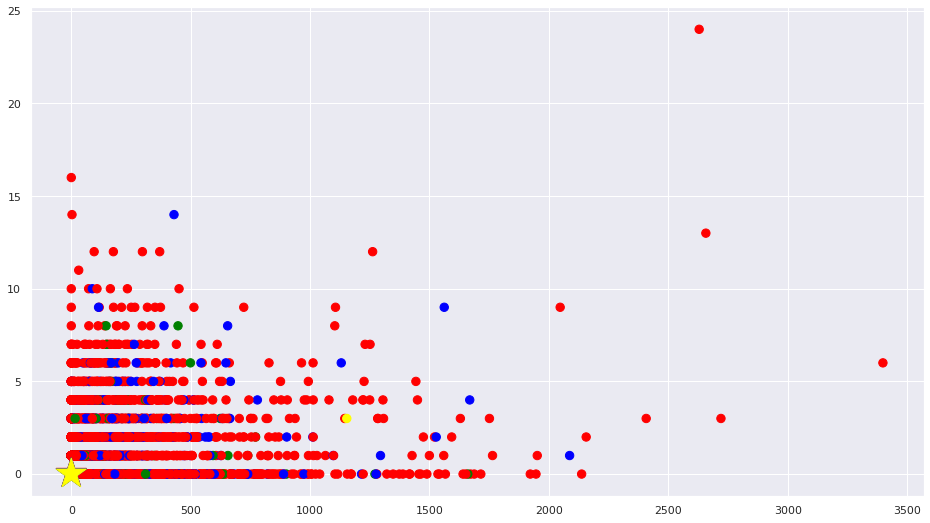

In [ ]:
# Getting the values and plotting it
f1 = df[c_eval[0]].values
f2 = df[c_eval[1]].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

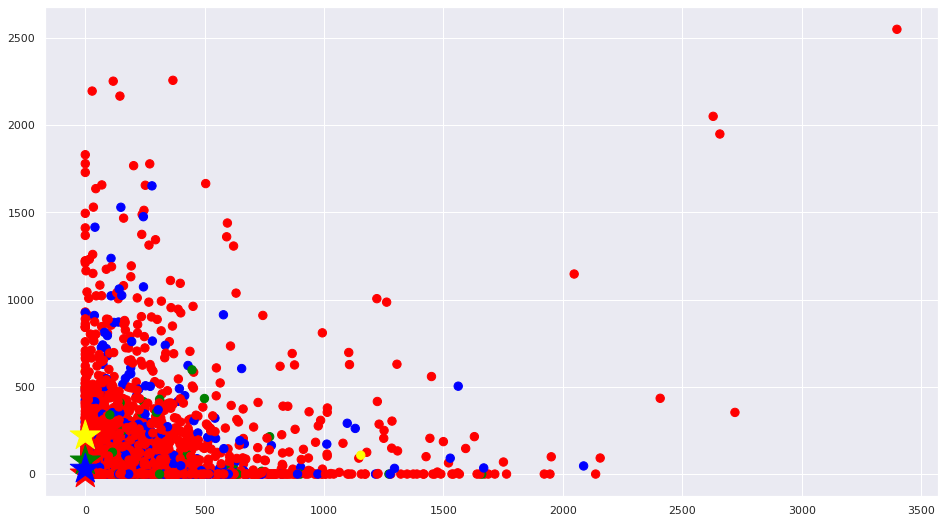

In [ ]:
f1 = df[c_eval[0]].values
f2 = df[c_eval[2]].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

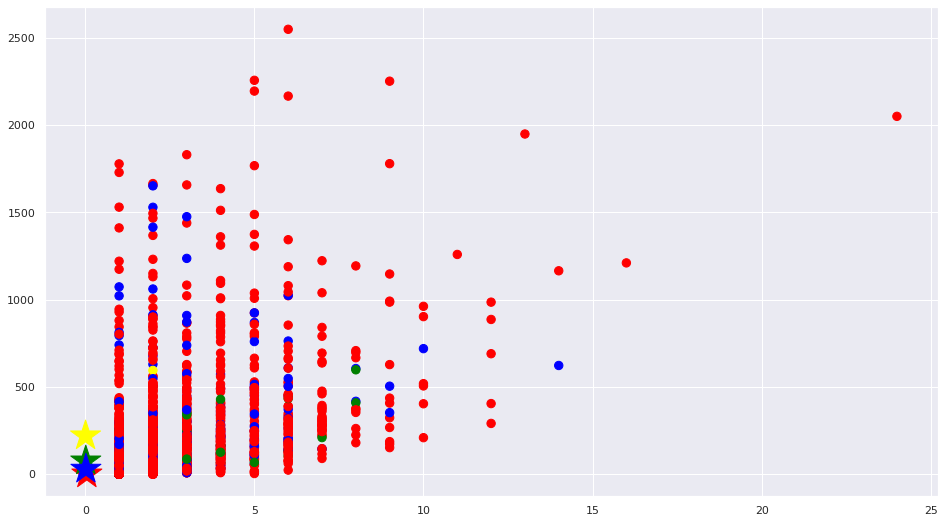

In [ ]:
f1 = df[c_eval[1]].values
f2 = df[c_eval[2]].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [ ]:
copy =  pd.DataFrame()
copy['Revenue']=df['Revenue'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,12073
1,green,257


In [ ]:
X = df[c_eval]
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=42)
print(X_train.shape, X_test.shape)

(8631, 3) (3699, 3)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print('Con KNN')
print('SCORE', knn.score(X_test, y_test))

Con KNN
SCORE 0.8732089753987564


In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print('Con random forestt')
print('SCORE', rfc.score(X_test, y_test))

Con random forestt
SCORE 0.8759124087591241


In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='poly', degree=2)
svm.fit(X_train, y_train)
print('Con SVC')
print('SCORE', svm.score(X_test, y_test))

Con SVC
SCORE 0.8664503919978372


In [ ]:
evc = VotingClassifier(estimators=[('rfc', rfc), ('knn', knn), ('svm', svm)], voting='hard')
evc.fit(X_train, y_train)
print('COn ensemble Voting')
print('SCORE', evc.score(X_test, y_test))

COn ensemble Voting
SCORE 0.8805082454717491
